<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap8/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap8/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap8
evaluate.py
load_data.py
train_test.py
show_images.py
trial.ipynb
model.py
load_data.cpython-36.pyc
show_images.cpython-36.pyc
train_test.cpython-36.pyc
evaluate.cpython-36.pyc
model.cpython-36.pyc
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [0]:
%matplotlib inline
import torch
import load_data
import show_images
import model
import train_test
import evaluate

In [4]:
classes, trainloader, testloader = load_data.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


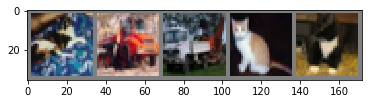

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = model.ResNet18()
my_model = net.to(device)
summary(my_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)

In [9]:
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4813604354858398 Batch_id=390 Accuracy=34.50: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 4665/10000 (46.65%)

EPOCH: 2


Loss=1.3054310083389282 Batch_id=390 Accuracy=52.30: 100%|██████████| 391/391 [00:28<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5627/10000 (56.27%)

EPOCH: 3


Loss=0.9348193407058716 Batch_id=390 Accuracy=63.28: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 6483/10000 (64.83%)

EPOCH: 4


Loss=0.630531907081604 Batch_id=390 Accuracy=71.98: 100%|██████████| 391/391 [00:29<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7225/10000 (72.25%)

EPOCH: 5


Loss=0.5466904640197754 Batch_id=390 Accuracy=78.18: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7523/10000 (75.23%)

EPOCH: 6


Loss=0.4013095796108246 Batch_id=390 Accuracy=82.93: 100%|██████████| 391/391 [00:29<00:00, 14.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7494/10000 (74.94%)

EPOCH: 7


Loss=0.3215794861316681 Batch_id=390 Accuracy=86.96: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7650/10000 (76.50%)

EPOCH: 8


Loss=0.445295512676239 Batch_id=390 Accuracy=90.29: 100%|██████████| 391/391 [00:29<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7748/10000 (77.48%)

EPOCH: 9


Loss=0.21204428374767303 Batch_id=390 Accuracy=93.24: 100%|██████████| 391/391 [00:28<00:00, 14.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7624/10000 (76.24%)

EPOCH: 10


Loss=0.13781806826591492 Batch_id=390 Accuracy=94.90: 100%|██████████| 391/391 [00:29<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 7669/10000 (76.69%)

EPOCH: 11


Loss=0.11937947571277618 Batch_id=390 Accuracy=96.11: 100%|██████████| 391/391 [00:29<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 7940/10000 (79.40%)

EPOCH: 12


Loss=0.13493382930755615 Batch_id=390 Accuracy=97.19: 100%|██████████| 391/391 [00:28<00:00, 14.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 7848/10000 (78.48%)

EPOCH: 13


Loss=0.07617475837469101 Batch_id=390 Accuracy=97.71: 100%|██████████| 391/391 [00:28<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 7897/10000 (78.97%)

EPOCH: 14


Loss=0.1127764955163002 Batch_id=390 Accuracy=97.94: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 7904/10000 (79.04%)

EPOCH: 15


Loss=0.059561144560575485 Batch_id=390 Accuracy=98.54: 100%|██████████| 391/391 [00:29<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 7967/10000 (79.67%)

EPOCH: 16


Loss=0.059991974383592606 Batch_id=390 Accuracy=98.90: 100%|██████████| 391/391 [00:28<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 7998/10000 (79.98%)

EPOCH: 17


Loss=0.0781753659248352 Batch_id=390 Accuracy=99.03: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 7887/10000 (78.87%)

EPOCH: 18


Loss=0.0421052947640419 Batch_id=390 Accuracy=99.02: 100%|██████████| 391/391 [00:29<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 8049/10000 (80.49%)

EPOCH: 19


Loss=0.022897446528077126 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [00:29<00:00, 14.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 7984/10000 (79.84%)

EPOCH: 20


Loss=0.003927820827811956 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [00:28<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 8043/10000 (80.43%)

EPOCH: 21


Loss=0.018073875457048416 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [00:28<00:00, 14.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 8007/10000 (80.07%)

EPOCH: 22


Loss=0.03471563011407852 Batch_id=390 Accuracy=99.49: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 8010/10000 (80.10%)

EPOCH: 23


Loss=0.01941092684864998 Batch_id=390 Accuracy=99.57: 100%|██████████| 391/391 [00:29<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 7979/10000 (79.79%)

EPOCH: 24


Loss=0.0017261147731915116 Batch_id=390 Accuracy=99.52: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 7943/10000 (79.43%)

EPOCH: 25


Loss=0.041719187051057816 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [00:28<00:00, 14.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 8072/10000 (80.72%)

EPOCH: 26


Loss=0.0061394451186060905 Batch_id=390 Accuracy=99.70: 100%|██████████| 391/391 [00:28<00:00, 14.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 8052/10000 (80.52%)

EPOCH: 27


Loss=0.003484231187030673 Batch_id=390 Accuracy=99.71: 100%|██████████| 391/391 [00:28<00:00, 14.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 8050/10000 (80.50%)

EPOCH: 28


Loss=0.0006349563482217491 Batch_id=390 Accuracy=99.79: 100%|██████████| 391/391 [00:29<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 8088/10000 (80.88%)

EPOCH: 29


Loss=0.000814545142930001 Batch_id=390 Accuracy=99.88: 100%|██████████| 391/391 [00:28<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 8149/10000 (81.49%)

EPOCH: 30


Loss=0.001668906188569963 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:28<00:00, 14.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 8144/10000 (81.44%)

EPOCH: 31


Loss=0.0002369522990193218 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:28<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 8183/10000 (81.83%)

EPOCH: 32


Loss=0.0003665447293315083 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:29<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 8191/10000 (81.91%)

EPOCH: 33


Loss=0.000249326229095459 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:29<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 8151/10000 (81.51%)

EPOCH: 34


Loss=4.189014362054877e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 8189/10000 (81.89%)

EPOCH: 35


Loss=0.00038357972516678274 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:29<00:00, 14.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8208/10000 (82.08%)

EPOCH: 36


Loss=0.00033556221751496196 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:29<00:00, 13.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8149/10000 (81.49%)

EPOCH: 37


Loss=0.00012841224088333547 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:29<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8173/10000 (81.73%)

EPOCH: 38


Loss=0.0002507805766072124 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8195/10000 (81.95%)

EPOCH: 39


Loss=3.0279159091151087e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8193/10000 (81.93%)

EPOCH: 40


Loss=2.1219253540039062e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8195/10000 (81.95%)

EPOCH: 41


Loss=0.0010207295417785645 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8228/10000 (82.28%)

EPOCH: 42


Loss=0.00016597509966231883 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 8214/10000 (82.14%)

EPOCH: 43


Loss=2.2602082026423886e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8182/10000 (81.82%)

EPOCH: 44


Loss=2.351999319216702e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8199/10000 (81.99%)

EPOCH: 45


Loss=6.406307511497289e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8197/10000 (81.97%)

EPOCH: 46


Loss=1.3613700502901338e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 8203/10000 (82.03%)

EPOCH: 47


Loss=0.00010771751112770289 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 8196/10000 (81.96%)

EPOCH: 48


Loss=3.0875205993652344e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8202/10000 (82.02%)

EPOCH: 49


Loss=6.055831818230217e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8206/10000 (82.06%)

EPOCH: 50


Loss=1.628398968023248e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.60it/s]



Test set: Average loss: 0.0107, Accuracy: 8214/10000 (82.14%)



In [13]:
for epoch in range(51,80):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 52


Loss=1.2087822142348159e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8223/10000 (82.23%)

EPOCH: 53


Loss=2.683401180547662e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8207/10000 (82.07%)

EPOCH: 54


Loss=3.1197072530630976e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8206/10000 (82.06%)

EPOCH: 55


Loss=1.0395049685030244e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8226/10000 (82.26%)

EPOCH: 56


Loss=3.4689903714024695e-06 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:28<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8195/10000 (81.95%)

EPOCH: 57


Loss=0.0004139900265727192 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:29<00:00, 14.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8134/10000 (81.34%)

EPOCH: 58


Loss=8.58306884765625e-06 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:29<00:00, 14.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8191/10000 (81.91%)

EPOCH: 59


Loss=2.098083541568485e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8204/10000 (82.04%)

EPOCH: 60


Loss=3.2949446904240176e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8215/10000 (82.15%)

EPOCH: 61


Loss=1.3148785001249053e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8214/10000 (82.14%)

EPOCH: 62


Loss=1.6629695892333984e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8213/10000 (82.13%)

EPOCH: 63


Loss=6.389617919921875e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8218/10000 (82.18%)

EPOCH: 64


Loss=0.00026952027110382915 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8225/10000 (82.25%)

EPOCH: 65


Loss=3.4570693969726562e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8214/10000 (82.14%)

EPOCH: 66


Loss=1.900196002679877e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8228/10000 (82.28%)

EPOCH: 67


Loss=2.789497330013546e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8229/10000 (82.29%)

EPOCH: 68


Loss=5.22494301549159e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8225/10000 (82.25%)

EPOCH: 69


Loss=0.00047707557678222656 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8222/10000 (82.22%)

EPOCH: 70


Loss=4.001855995738879e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8216/10000 (82.16%)

EPOCH: 71


Loss=3.4809113458322827e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8242/10000 (82.42%)

EPOCH: 72


Loss=6.5207482293772046e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8225/10000 (82.25%)

EPOCH: 73


Loss=7.46369332773611e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8245/10000 (82.45%)

EPOCH: 74


Loss=4.601478394761216e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8239/10000 (82.39%)

EPOCH: 75


Loss=7.878542237449437e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8242/10000 (82.42%)

EPOCH: 76


Loss=1.913309097290039e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8241/10000 (82.41%)

EPOCH: 77


Loss=4.57763690064894e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8245/10000 (82.45%)

EPOCH: 78


Loss=3.5405159906076733e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8245/10000 (82.45%)

EPOCH: 79


Loss=9.250640687241685e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8247/10000 (82.47%)

EPOCH: 80


Loss=3.5047530673182337e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.64it/s]



Test set: Average loss: 0.0109, Accuracy: 8232/10000 (82.32%)



In [14]:
for epoch in range(80,105):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 81


Loss=4.95910626341356e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8224/10000 (82.24%)

EPOCH: 82


Loss=5.781650543212891e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8238/10000 (82.38%)

EPOCH: 83


Loss=9.059905892172537e-07 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8220/10000 (82.20%)

EPOCH: 84


Loss=2.5546551114530303e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8244/10000 (82.44%)

EPOCH: 85


Loss=5.555152711167466e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8239/10000 (82.39%)

EPOCH: 86


Loss=1.2111663636460435e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8238/10000 (82.38%)

EPOCH: 87


Loss=1.430511474609375e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8245/10000 (82.45%)

EPOCH: 88


Loss=2.7561187380342744e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8237/10000 (82.37%)

EPOCH: 89


Loss=3.3617020562815014e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8229/10000 (82.29%)

EPOCH: 90


Loss=4.673004241340095e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8230/10000 (82.30%)

EPOCH: 91


Loss=1.62124638336536e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8250/10000 (82.50%)

EPOCH: 92


Loss=1.1920928955078125e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8238/10000 (82.38%)

EPOCH: 93


Loss=2.5510787509119837e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8245/10000 (82.45%)

EPOCH: 94


Loss=6.803274300182238e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8247/10000 (82.47%)

EPOCH: 95


Loss=2.2649765014648438e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8233/10000 (82.33%)

EPOCH: 96


Loss=1.0490417707842425e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8246/10000 (82.46%)

EPOCH: 97


Loss=1.1205672763026087e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8235/10000 (82.35%)

EPOCH: 98


Loss=1.6462803614558652e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8244/10000 (82.44%)

EPOCH: 99


Loss=5.865097136847908e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8249/10000 (82.49%)

EPOCH: 100


Loss=3.437995837884955e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 8235/10000 (82.35%)

EPOCH: 101


Loss=0.0006853938102722168 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8251/10000 (82.51%)

EPOCH: 102


Loss=6.604194823012222e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8257/10000 (82.57%)

EPOCH: 103


Loss=9.322166079073213e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8245/10000 (82.45%)

EPOCH: 104


Loss=1.8596649624669226e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8229/10000 (82.29%)

EPOCH: 105


Loss=5.197524842515122e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.59it/s]



Test set: Average loss: 0.0111, Accuracy: 8251/10000 (82.51%)



In [15]:
for epoch in range(105,150):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 106


Loss=8.249282473116182e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8252/10000 (82.52%)

EPOCH: 107


Loss=0.00010026693053077906 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8251/10000 (82.51%)

EPOCH: 108


Loss=8.643865294288844e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8246/10000 (82.46%)

EPOCH: 109


Loss=3.051757857974735e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8232/10000 (82.32%)

EPOCH: 110


Loss=1.8596649624669226e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8245/10000 (82.45%)

EPOCH: 111


Loss=2.646446318976814e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8237/10000 (82.37%)

EPOCH: 112


Loss=1.3494491213350557e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8236/10000 (82.36%)

EPOCH: 113


Loss=2.0742415927088587e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8229/10000 (82.29%)

EPOCH: 114


Loss=7.629394644936838e-07 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8252/10000 (82.52%)

EPOCH: 115


Loss=4.8756601245258935e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8249/10000 (82.49%)

EPOCH: 116


Loss=3.1113625027501257e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8254/10000 (82.54%)

EPOCH: 117


Loss=3.2901764370762976e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8249/10000 (82.49%)

EPOCH: 118


Loss=2.956390289909905e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8249/10000 (82.49%)

EPOCH: 119


Loss=6.449222564697266e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8241/10000 (82.41%)

EPOCH: 120


Loss=2.169609160773689e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8253/10000 (82.53%)

EPOCH: 121


Loss=8.58306884765625e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8250/10000 (82.50%)

EPOCH: 122


Loss=1.76668163476279e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8242/10000 (82.42%)

EPOCH: 123


Loss=0.0001235723466379568 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8251/10000 (82.51%)

EPOCH: 124


Loss=3.6478043057286413e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8246/10000 (82.46%)

EPOCH: 125


Loss=9.775161743164062e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8246/10000 (82.46%)

EPOCH: 126


Loss=3.1018258596304804e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8233/10000 (82.33%)

EPOCH: 127


Loss=7.486343292839592e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8249/10000 (82.49%)

EPOCH: 128


Loss=3.2699106668587774e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8236/10000 (82.36%)

EPOCH: 129


Loss=1.5044211977510713e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8233/10000 (82.33%)

EPOCH: 130


Loss=8.82148754044465e-07 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8236/10000 (82.36%)

EPOCH: 131


Loss=4.0531159584134e-07 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8248/10000 (82.48%)

EPOCH: 132


Loss=8.893012818589341e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8251/10000 (82.51%)

EPOCH: 133


Loss=3.716945502674207e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8238/10000 (82.38%)

EPOCH: 134


Loss=8.535384949936997e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8253/10000 (82.53%)

EPOCH: 135


Loss=5.424022674560547e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8250/10000 (82.50%)

EPOCH: 136


Loss=1.9609928131103516e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8261/10000 (82.61%)

EPOCH: 137


Loss=4.804134277947014e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8250/10000 (82.50%)

EPOCH: 138


Loss=2.9802322387695312e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8250/10000 (82.50%)

EPOCH: 139


Loss=1.9717215764103457e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8238/10000 (82.38%)

EPOCH: 140


Loss=1.6450882185381488e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 8262/10000 (82.62%)

EPOCH: 141


Loss=3.266334488216671e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8237/10000 (82.37%)

EPOCH: 142


Loss=7.68899917602539e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8250/10000 (82.50%)

EPOCH: 143


Loss=3.14712519866589e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8241/10000 (82.41%)

EPOCH: 144


Loss=1.0728836059570312e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8257/10000 (82.57%)

EPOCH: 145


Loss=1.573562599332945e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8265/10000 (82.65%)

EPOCH: 146


Loss=5.984306426398689e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8249/10000 (82.49%)

EPOCH: 147


Loss=0.0002660989703144878 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8257/10000 (82.57%)

EPOCH: 148


Loss=3.1709671475255163e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8257/10000 (82.57%)

EPOCH: 149


Loss=2.86102294921875e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8242/10000 (82.42%)

EPOCH: 150


Loss=2.8848648980783764e-06 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.61it/s]



Test set: Average loss: 0.0113, Accuracy: 8256/10000 (82.56%)



GroundTruth:    car  ship plane  deer horse
Predicted:    car  ship  ship  deer horse


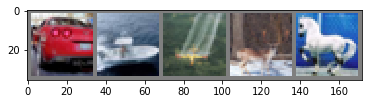

In [16]:
evaluate.show_predicted_actual(my_model, device, testloader, classes)

In [17]:
evaluate.evaluate_accuracy(my_model, device, testloader)

Accuracy of the network on the 10000 test images: 82 %


In [18]:
evaluate.evaluate_classwise_accuracy(my_model, device, classes, testloader)

Accuracy of plane : 83 %
Accuracy of   car : 92 %
Accuracy of  bird : 73 %
Accuracy of   cat : 57 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 92 %
Accuracy of horse : 80 %
Accuracy of  ship : 94 %
Accuracy of truck : 84 %
